In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv' , encoding='ISO-8859-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3614,ham,I enjoy watching and playing football and bask...,NaN,NaN,NaN
2286,ham,I have had two more letters from . I will copy...,NaN,NaN,NaN
791,ham,All e best 4 ur driving tmr :-),NaN,NaN,NaN
2227,ham,Oh k.k..where did you take test?,NaN,NaN,NaN
1349,spam,FREE2DAY sexy St George's Day pic of Jordan!Tx...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns = ["Unnamed: 2"  , "Unnamed: 3" , "Unnamed: 4"] , inplace=True)

In [7]:
df.rename(columns = {"v1":"target" , "v2":"text"} , inplace = True)
df.sample(5)

,target,text
2576,ham,In sch but neva mind u eat 1st lor..
1160,ham,You sure your neighbors didnt pick it up
1144,ham,Really... I tot ur paper ended long ago... But...
539,ham,"I am in tirupur da, once you started from offi..."
3902,ham,Waiting in e car 4 my mum lor. U leh? Reach ho...


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df["target"] = encoder.fit_transform(df["target"])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(403)

In [13]:
df = df.drop_duplicates(keep = "first")

In [14]:
df.shape

(5169, 2)

In [15]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

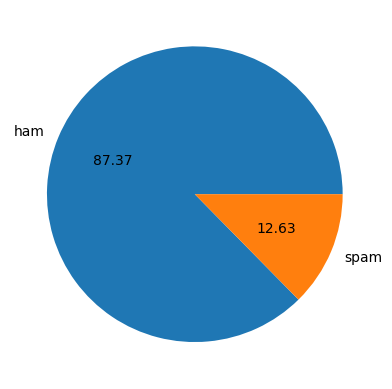

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f");
plt.show()

In [17]:
!pip install nltk


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sm06s\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:
df['num_characters']=df['text'].apply(len)

In [20]:
from nltk.tokenize import word_tokenize  # Now import word_tokenize
df['num_words'] = df['text'].apply(lambda x: len(word_tokenize(x)))

In [21]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [23]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[['num_characters' ,'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
df[df['target']==0][['num_characters' ,'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
df[df['target']==1][['num_characters' ,'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [27]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

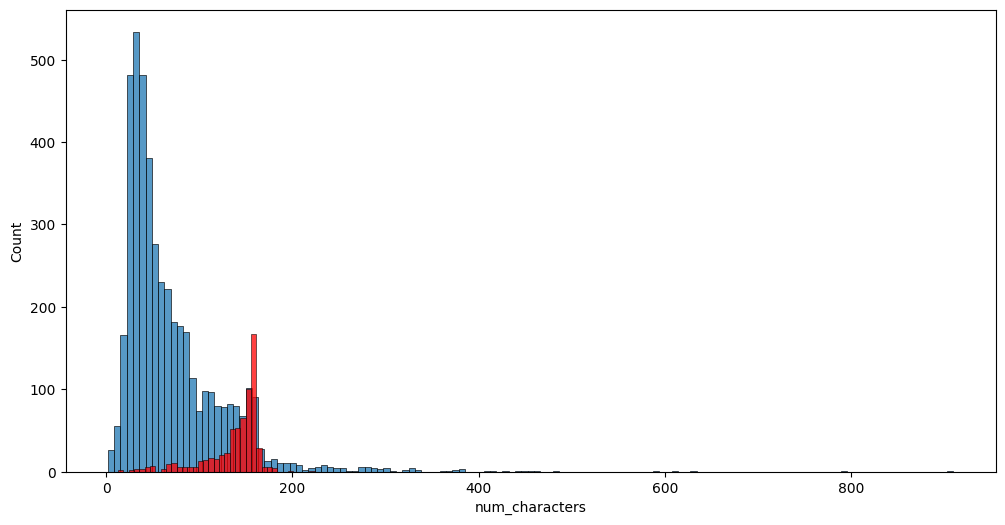

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'] , color='red')


<Axes: xlabel='num_words', ylabel='Count'>

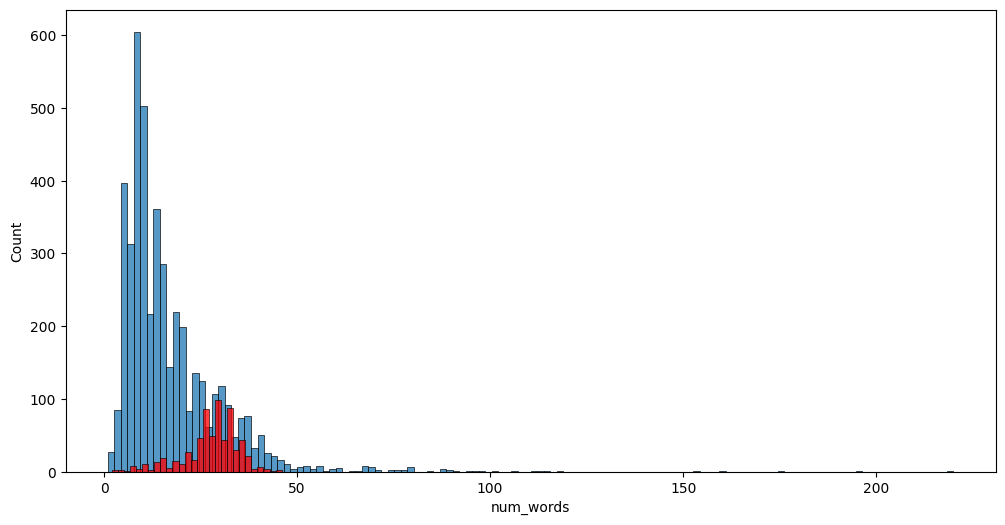

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'] , color='red')

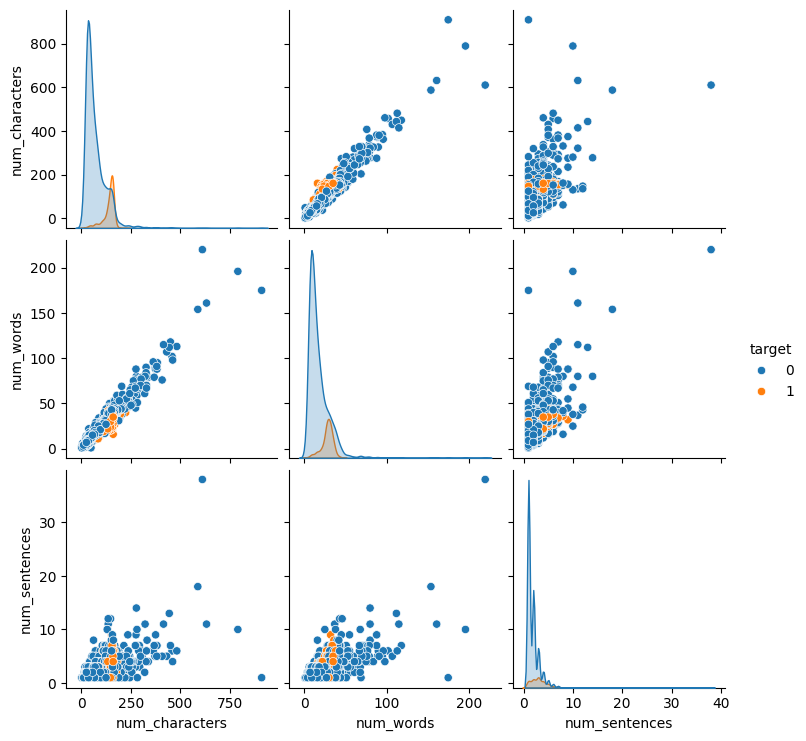

In [30]:
sns.pairplot(df , hue="target")

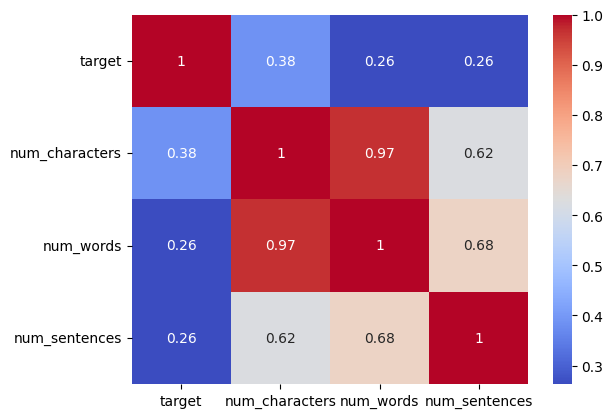

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.show()


In [32]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')       
nltk.download('stopwords')   

def transform_text(text):
    text = text.lower()                      
    text = word_tokenize(text)               
    y = []
    for i in text:
        if i.isalnum():                      
            y.append(i)
    text = y[:]                             
    y.clear()                               
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)  
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sm06s\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sm06s\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
transform_text("HI I am shaan working on ML @@")

'hi shaan work ml'

In [33]:
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("jumping")

'jump'

In [35]:
df["transformed_text"]=df['text'].apply(transform_text)

In [36]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [37]:
import sys 
!{sys.executable} -m pip install wordcloud


In [38]:
from wordcloud import WordCloud
wc= WordCloud(width = 500 , height = 500 , min_font_size = 10 , background_color = "white")
spam_wc=wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

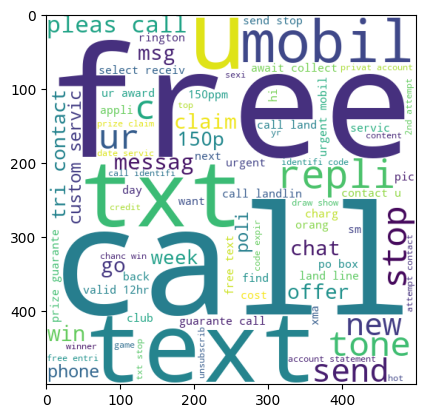

In [39]:
plt.imshow(spam_wc)

In [40]:
from wordcloud import WordCloud
wc= WordCloud(width = 500 , height = 500 , min_font_size = 10 , background_color = "white")
ham_wc=wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))

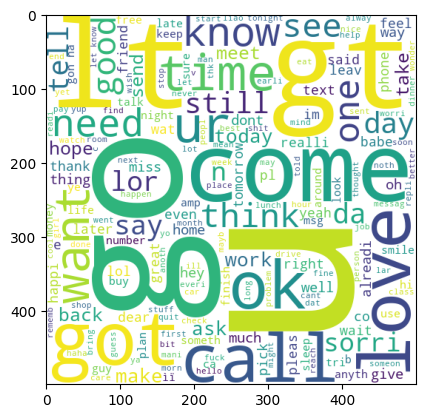

In [41]:
plt.imshow(ham_wc)

In [42]:
spam_corpus=[]
for msg in df[df["target"]==1]["transformed_text"].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [43]:
len(spam_corpus)

9939

In [44]:
# print(spam_corpus)

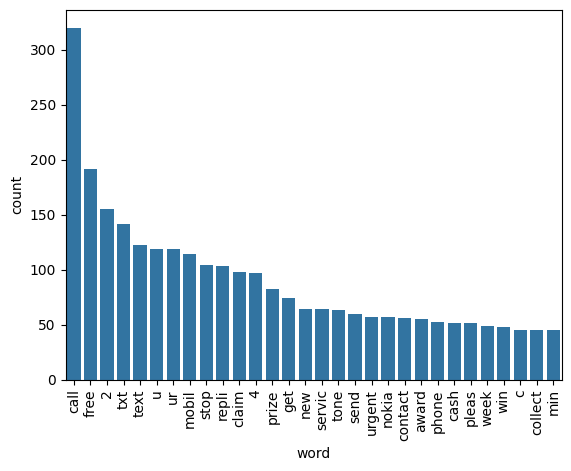

In [45]:
from collections import Counter
top30 = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot using sns.barplot
sns.barplot(x='word', y='count', data=top30)
#to increase readability
plt.xticks(rotation="vertical")
plt.show()

In [46]:
ham_corpus=[]
for msg in df[df["target"]==0]["transformed_text"].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [47]:
len(ham_corpus)

35404

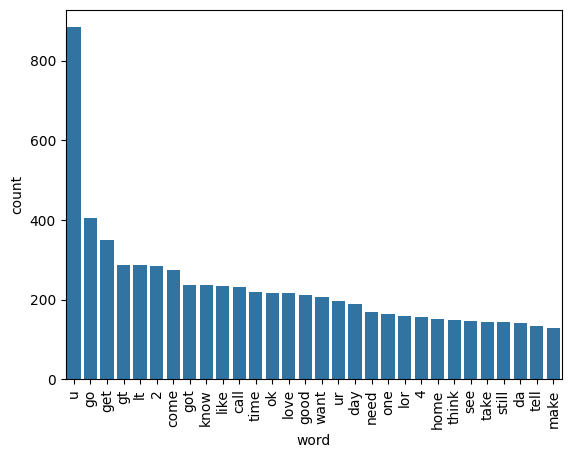

In [48]:
from collections import Counter
top30 = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plot using sns.barplot
sns.barplot(x='word', y='count', data=top30)
#to increase readability
plt.xticks(rotation="vertical")
plt.show()

In [50]:
 #Model Building
 from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
 cv = CountVectorizer()
 tfidf = TfidfVectorizer(max_features= 3000)

In [51]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()

In [52]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5169, 3000))

In [53]:
y = df["target"].values

In [54]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [56]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=2)

In [57]:
X_train.shape

(4135, 3000)

In [58]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB

In [59]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [60]:
gnb.fit(X_train , y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))
print(precision_score(y_test , y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [61]:
mnb.fit(X_train , y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test , y_pred2))
print(confusion_matrix(y_test , y_pred2))
print(precision_score(y_test , y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [62]:
bnb.fit(X_train , y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test , y_pred3))
print(confusion_matrix(y_test , y_pred3))
print(precision_score(y_test , y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBClassifier



In [64]:
svc = SVC(kernel = "sigmoid" , gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth= 5)
lrc= LogisticRegression(solver = "liblinear" , penalty = "l1")
rfc = RandomForestClassifier(n_estimators = 50 , random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50 , random_state = 2)
bc = BaggingClassifier (n_estimators = 50 , random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50 , random_state =2)
gdbt = GradientBoostingClassifier(n_estimators = 50 , random_state= 2)
xgb = XGBClassifier(n_estimators = 50 , random_state = 2)

In [65]:
clfs = {
    "SVC": svc,
    "KN" : knc,
    "NB" : mnb,
    "DT" : dtc,
    "LR" : lrc,
    "RF" : rfc,
    # "Adaboost" : abc,
    # "BgC" : bc,
    # "ETC" : etc,
    # "GDBT": gdbt,
    # "xgb" : xgb
}

In [66]:
def train_classifier (clf , X_train , y_train , X_test , y_test):
    clf.fit(X_train , y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test , y_pred)
    precision = precision_score(y_test , y_pred)
    return accuracy , precision

In [67]:
train_classifier(svc , X_train , y_train  , X_test , y_test)

(0.9758220502901354, 0.9747899159663865)

In [68]:
accuracy_scores=[]
precision_scores=[]
for name , clf in clfs.items():
    curr_accuracy , curr_precision = train_classifier(clf ,X_train , y_train , X_test , y_test)
    print(f"For {name}")
    print(f"Accuracy - {curr_accuracy}")
    print(f"Precision - {curr_precision}")
    accuracy_scores.append(curr_accuracy)
    precision_scores.append(curr_precision)

For SVC
Accuracy - 0.9758220502901354
Precision - 0.9747899159663865
For KN
Accuracy - 0.9052224371373307
Precision - 1.0
For NB
Accuracy - 0.9709864603481625
Precision - 1.0
For DT
Accuracy - 0.9342359767891683
Precision - 0.85
For LR
Accuracy - 0.9555125725338491
Precision - 0.96
For RF
Accuracy - 0.9738878143133463
Precision - 0.9826086956521739


In [71]:
 performance_df = pd.DataFrame({
     "Algorithms": clfs.keys(),
     "Accuracy" : accuracy_scores,
     "Precision" : precision_scores
 }).sort_values("Precision", ascending = False)

In [72]:
performance_df

,Algorithms,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
4,LR,0.955513,0.960000
3,DT,0.934236,0.850000


In [74]:
performance_df1 = pd.melt(performance_df , id_vars = "Algorithms")

In [75]:
performance_df1

,Algorithms,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.973888
3,SVC,Accuracy,0.975822
4,LR,Accuracy,0.955513
5,DT,Accuracy,0.934236
6,KN,Precision,1.000000
7,NB,Precision,1.000000
8,RF,Precision,0.982609
9,SVC,Precision,0.974790


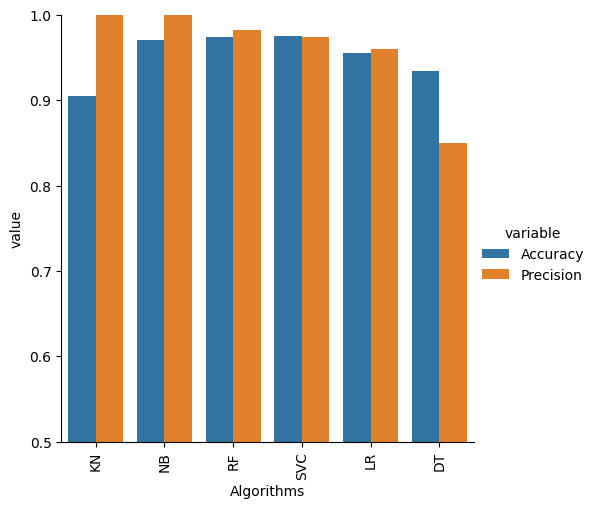

In [77]:
sns.catplot(x="Algorithms" , y="value" , hue = "variable" , data = performance_df1 , kind = "bar" , height = 5)
plt.ylim(0.5 , 1.0)
plt.xticks(rotation = "vertical")
plt.show()

In [78]:
import pickle
pickle.dump(tfidf ,open("vectorizer.pkl" , "wb"))
pickle.dump(mnb , open("model.pkl" , "wb"))

In [80]:
import sys
print(sys.version.split()[0])

3.13.0
